<a href="https://colab.research.google.com/github/denxxs/DL-assignment-test/blob/main/mihirwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imbalance_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
# Load the data
loan_data = pd.read_csv('loan_data (1).csv')

In [ ]:
# Separate the features and the target variable
X = loan_data.drop(columns=['TARGET'])
y = loan_data['TARGET']

In [ ]:
# Define the numerical and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()


In [ ]:
# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [ ]:
# Create a preprocessing and SMOTE pipeline
pipeline = make_imbalance_pipeline(
    preprocessor,
    SMOTE(random_state=42))

In [ ]:
# Preprocess the data and apply SMOTE
X_processed, y_processed = pipeline.fit_resample(X, y)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)


In [ ]:
# Define the deep learning model architecture
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=256, verbose=1)


Epoch 1/100
1414/1414 [==============================] - 20s 13ms/step - loss: 0.5414 - accuracy: 0.7288 - val_loss: 0.4586 - val_accuracy: 0.7857
Epoch 2/100
1414/1414 [==============================] - 26s 18ms/step - loss: 0.4462 - accuracy: 0.7926 - val_loss: 0.3760 - val_accuracy: 0.8329
Epoch 3/100
1414/1414 [==============================] - 29s 20ms/step - loss: 0.3934 - accuracy: 0.8225 - val_loss: 0.3414 - val_accuracy: 0.8517
Epoch 4/100
1414/1414 [==============================] - 18s 13ms/step - loss: 0.3631 - accuracy: 0.8379 - val_loss: 0.3133 - val_accuracy: 0.8651
Epoch 5/100
1414/1414 [==============================] - 14s 10ms/step - loss: 0.3422 - accuracy: 0.8493 - val_loss: 0.3002 - val_accuracy: 0.8740
Epoch 6/100
1414/1414 [==============================] - 15s 10ms/step - loss: 0.3247 - accuracy: 0.8578 - val_loss: 0.2866 - val_accuracy: 0.8814
Epoch 7/100
1414/1414 [==============================] - 15s 10ms/step - loss: 0.3107 - accuracy: 0.8647 - val_loss: 0

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test) > 0.5

3534/3534 [==============================] - 9s 2ms/step


In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])


In [ ]:
# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Sensitivity: {sensitivity}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.935281892549193
Recall: 0.9135994623180459
Sensitivity: 0.9135994623180459
ROC AUC: 0.9352824678223879


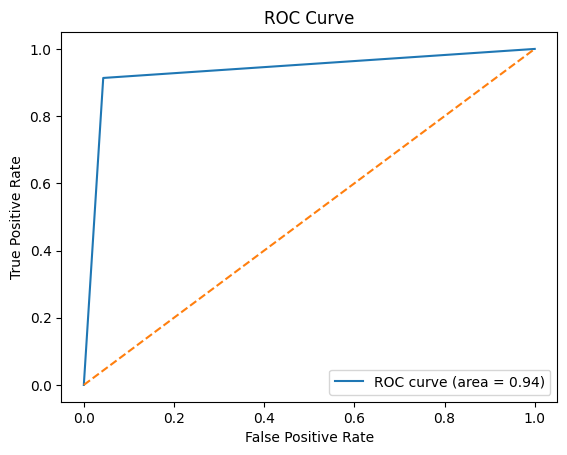

In [ ]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()